<a href="https://colab.research.google.com/github/Thavatharani06/231801180_PODS/blob/main/Ex6b_Time_Series_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df = pd.read_csv(url,parse_dates=['Month'],index_col='Month')

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
Passengers    0
dtype: int64


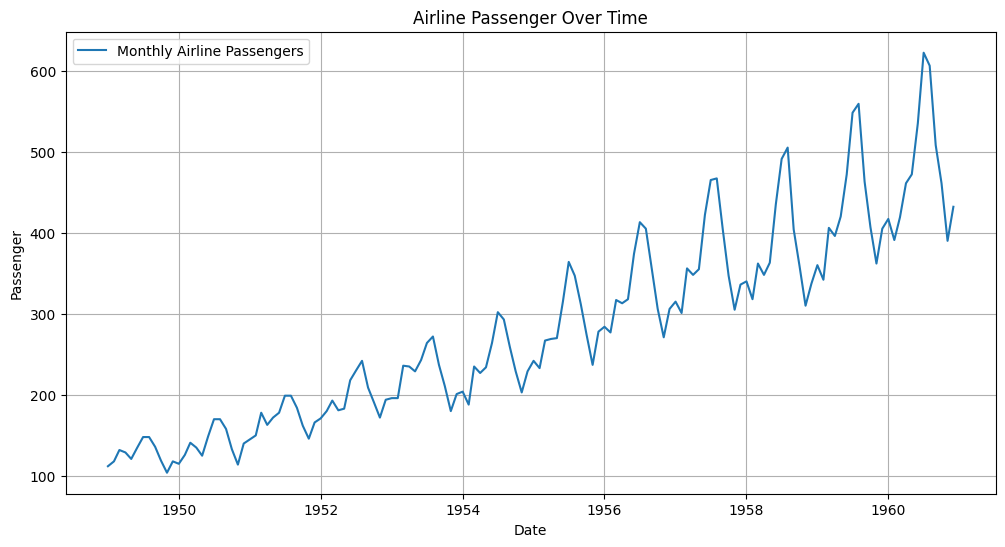

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df, label='Monthly Airline Passengers')
plt.title("Airline Passenger Over Time")
plt.xlabel("Date")
plt.ylabel("Passenger")
plt.legend()
plt.grid(1)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Passengers'])
print('ADF Statistic: ', result[0])
print('p-value: ',  result[1])
print('Critical Values: ',result[4])


ADF Statistic:  0.8153688792060498
p-value:  0.991880243437641
Critical Values:  {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


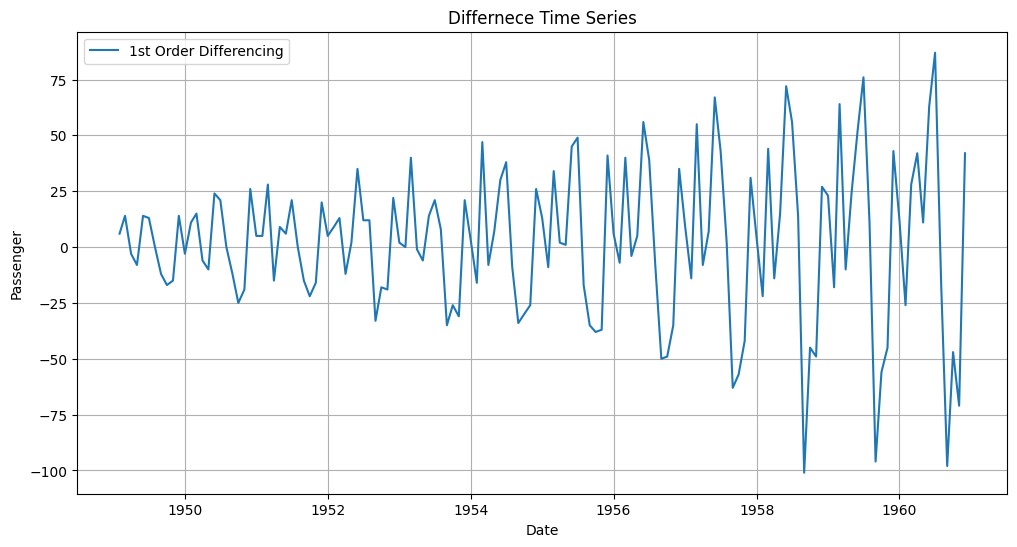

In [5]:
df_diff=df.diff().dropna()

plt.figure(figsize=(12,6))
plt.plot(df_diff,label='1st Order Differencing')
plt.title('Differnece Time Series')
plt.xlabel('Date')
plt.ylabel('Passenger')
plt.legend()
plt.grid(1)
plt.show()

In [6]:
result=adfuller(df_diff['Passengers'])
print('ADF Statistic: ', result[0])
print('p-value: ',  result[1])
print('Critical Values: ',result[4])

ADF Statistic:  -2.8292668241700047
p-value:  0.05421329028382478
Critical Values:  {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


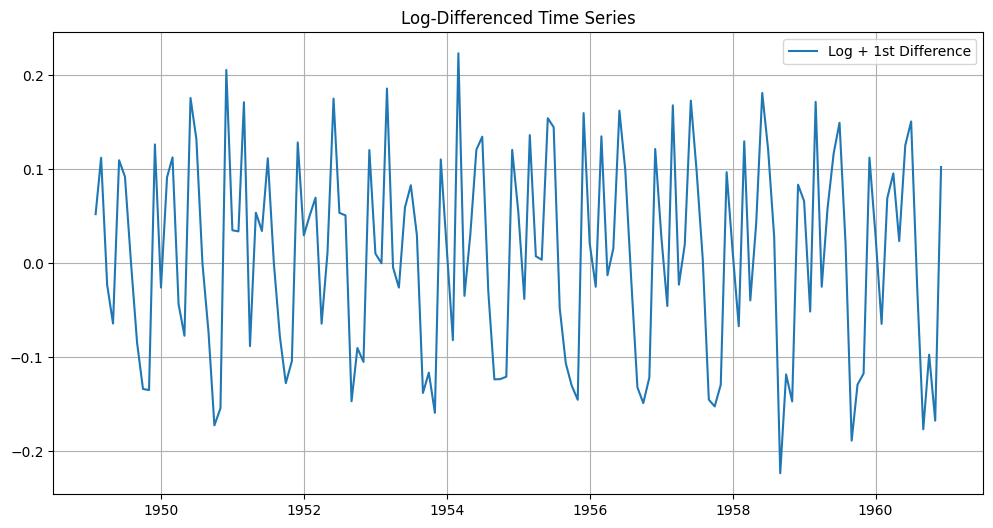

ADF Statistic (log+diff): -2.717130598388114
p-value: 0.07112054815086184


In [7]:
import numpy as np


df_log = np.log(df)


df_log_diff = df_log.diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(df_log_diff, label='Log + 1st Difference')
plt.title('Log-Differenced Time Series')
plt.legend()
plt.grid(True)
plt.show()


adf_log_diff = adfuller(df_log_diff['Passengers'])
print('ADF Statistic (log+diff):', adf_log_diff[0])
print('p-value:', adf_log_diff[1])


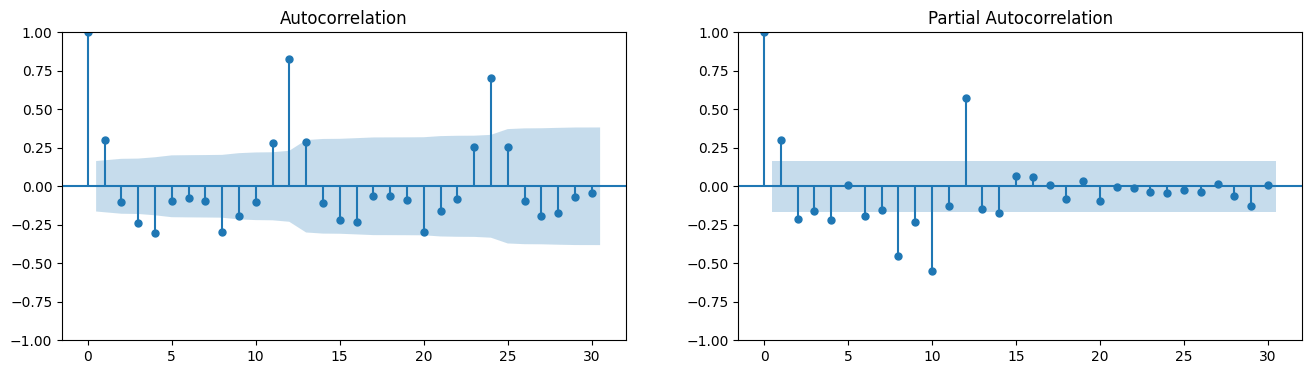

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16,4))
sm.graphics.tsa.plot_acf(df_diff, lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_diff, lags=30, ax=axes[1])
plt.show()

In [ ]:
p=1
q=1

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=[p,1,q])
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -526.123
Date:                Tue, 16 Sep 2025   AIC                           1058.246
Time:                        11:07:52   BIC                           1066.454
Sample:                    01-01-1949   HQIC                          1061.577
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5111      0.114     -4.488      0.000      -0.734      -0.288
ma.L1          0.9144      0.056     16.251      0.000       0.804       1.025
sigma2       592.7851    101.208      5.857      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=len(test))


forecast = pd.Series(forecast, index=test.index)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print('MSE: {mse:.2f}')
print('MAE: {mae:.2f}')
print('RMSE: {rmse:.2f}')

MSE: {mse:.2f}
MAE: {mae:.2f}
RMSE: {rmse:.2f}


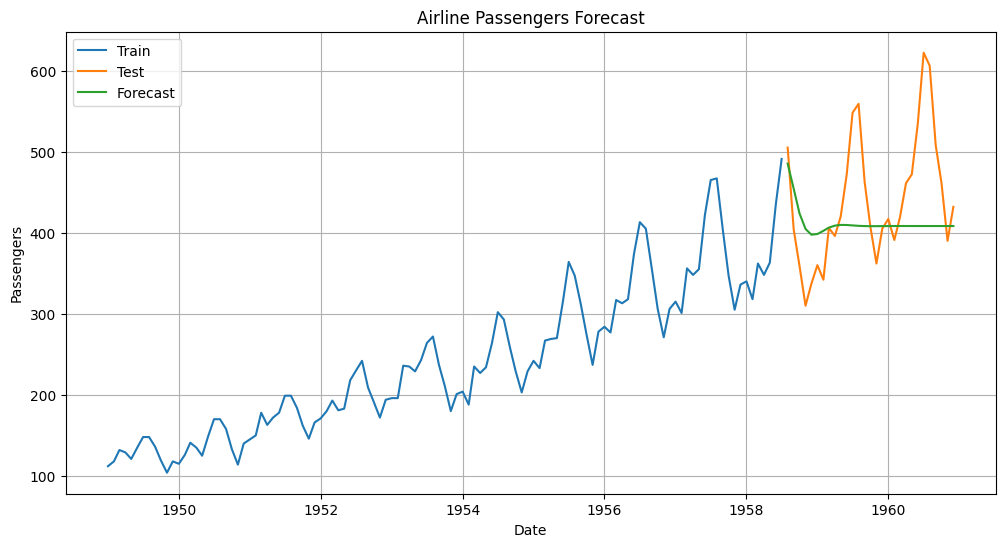

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.title('Airline Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(1)
plt.show()
